# Zahra Parham 2122841

## 1 Sampling

### 1.1

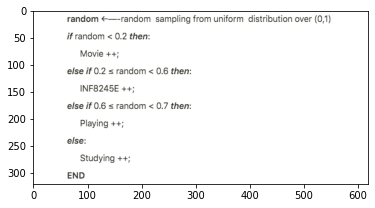

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('1.jpg')
imgplot = plt.imshow(img)


### 1.2

In [ ]:
import numpy as np
test = np.zeros(4)
test[0]= 4
test

def prob(n):
    result = np.zeros(4)
    for i in range(n):
        random = np.random.uniform(0,1)
        if random < 0.2:
            result[0] = result[0] + 1
        if random >= 0.2 and random< 0.6:
            result[1] = result[1] + 1

        if random >= 0.6 and random<0.7:
            result[2] = result[2] + 1

        if random>=0.7 and random <=1:
            result[3] = result[3] + 1

    return result / n
    


In [ ]:
result_100 = prob(100)
print(f"in 100 days - movie: {result_100[0]}, INF8245E:{result_100[1]}, playing:{result_100[2]}, studying:{result_100[3]} ")
result_1000 = prob(1000)
print(f"in 1000 days - movie: {result_1000[0]}, INF8245E:{result_1000[1]}, playing:{result_1000[2]}, studying:{result_1000[3]} ")

       

in 100 days - movie: 0.22, INF8245E:0.34, playing:0.07, studying:0.37 
in 1000 days - movie: 0.198, INF8245E:0.391, playing:0.079, studying:0.332 


Based on comparing the fraction in 100 days and 1000 days, we can assume that by increasing the number of sampling, each activity will get closer to its probability

### 2 Model Selection

### 2.1

In [ ]:
# first I split train data, test data and validation data to x and y:
import pandas as pd
dataset_test = pd.read_csv("Datasets/Dataset_1_test.csv", header = None)
test_x = dataset_test[0]
test_y = dataset_test[1]


In [ ]:
dataset_train = pd.read_csv("Datasets/Dataset_1_train.csv", header = None)
train_x = dataset_train[0]
train_y = dataset_train[1]

In [ ]:
dataset_valid =pd.read_csv("Datasets/Dataset_1_valid.csv", header = None)
valid_x = dataset_valid[0]
valid_y = dataset_valid[1]

### 1.a

In [ ]:
#cover x to a 50*20 matrix
def final_x(x):
    result = np.zeros((50,20))
    for i in range(50):
        for j in range(20):
            result[i][j] = x[i] ** j
    return result


#compute RSME:
def f_rmse(x, y, w):
    y_hat = np.dot(x, w)
    return np.sqrt(np.sum((y_hat - y) ** 2 )/ 50)

final_x_train = final_x(train_x)
final_x_valid = final_x(valid_x)

#Compute W:
def w(x , y):
    x_t = np.transpose(x)
    x_t_x = np.dot(x_t, x)
    x_t_x_inv = np.linalg.inv(x_t_x)
    x_t_y = np.dot(x_t, y)
    w = np.dot(x_t_x_inv, x_t_y)
    return w
w = w(final_x_train, train_y)
rmse_valid = f_rmse(final_x_valid, valid_y, w)
rmse_train = f_rmse(final_x_train, train_y, w)


print(f"Train RMSE:{rmse_train}, Validation RMSE{rmse_valid}")  
    
      

Train RMSE:2.6774364810380065, Validation RMSE18.352463341124924


### 1.b

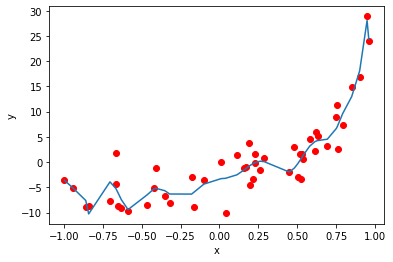

In [ ]:
import itertools
new_x, new_y = zip(*sorted(zip(train_x, np.dot(final_x_train, w))))
import matplotlib.pyplot as plt

plt.plot(train_x, train_y, 'ro')
plt.plot(new_x, new_y)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

#plot all of them after

### 1.c

The model is overfitting since, based on the plot, it is fit to the train data too closely, and also based on comparing the RMSE for train data and test data, we can assume that the model is overfitting.

### 2

### 2.a

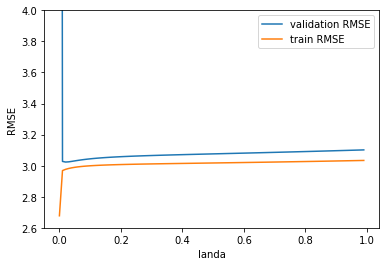

In [ ]:
#cover x to a 50*20 matrix
def final_x(x):
    result = np.zeros((50,20))
    for i in range(50):
        for j in range(20):
            result[i][j] = x[i] ** j
    return result


#compute RSME:
def f_rmse(x, y, w):
    y_hat = np.dot(x, w)
    return np.sqrt(np.sum((y_hat - y) ** 2 )/ 50)

final_x_train = final_x(train_x)
final_x_valid = final_x(valid_x)

#Compute W:
def w_reg(x , y, landa):
    I = np.identity(20)
    x_t = np.transpose(x)
    x_t_x = np.dot(x_t, x)
    x_t_landa =x_t_x  + np.dot(landa, I)
    x_t_x_inv = np.linalg.inv(x_t_landa)
    x_t_y = np.dot(x_t, y)
    w = np.dot(x_t_x_inv, x_t_y)
    return w
    
      

rmse_reg_valid = []
rmse_reg_train = [] 

for landa in np.arange(0, 1, 0.01):
    w = w_reg(final_x_train, train_y, landa)
    rmse_reg_valid.append(f_rmse(final_x_valid, valid_y, w))
    rmse_reg_train.append(f_rmse(final_x_train, train_y, w))


    
x= np.arange(0,1,0.01)    
plt.plot(x, rmse_reg_valid, label = "validation RMSE")
plt.plot(x, rmse_reg_train, label = "train RMSE")
plt.xlabel("landa")
plt.ylabel("RMSE")
plt.ylim([2.6, 4])
plt.legend()
plt.show()



### 2.b

best landa based on the plot is 0.01

In [ ]:
best_w =w_reg(final_x_train, train_y, 0.01)

rmse_reg_test = f_rmse(final_x(test_x), test_y, best_w)
print(f"RMSE for test data with the best landa = 0.01 is: {rmse_reg_test}")

RMSE for test data with the best landa = 0.01 is: 3.2925595397745555


### 2.c

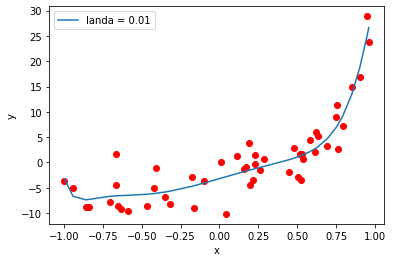

In [ ]:
import itertools
new_x, new_y = zip(*sorted(zip(train_x, np.dot(final_x_train, best_w))))
import matplotlib.pyplot as plt

plt.plot(train_x, train_y, 'ro')
plt.plot(new_x, new_y, label ="landa = 0.01")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



### 2.d

This is a good fit for the data because:

1- based on the plot, it does not fit too closely or does not have enough flexibility in terms of line fitting( learning too much or too small)

2- based on the RMSE on test and train data, we can assume that the model is not overfitting or underfitting since it has good RMSE(result) on both the train and test dataset

### 3

it's hard to infer the exact degree from the last plot but from comparing the last plot with the other degree polynomial it can be a third-degree polynomial

### 3 Gradient Descent for Regression

### 3.1

In [ ]:
import pandas as pd
dataset_train = pd.read_csv("Datasets/Dataset_2_train.csv", header = None)

train_x = dataset_train[0]
train_x = train_x.to_numpy()
train_y = dataset_train[1]
train_y= train_y.to_numpy()

dataset_test = pd.read_csv("Datasets/Dataset_2_test.csv", header = None)
test_x = dataset_test[0]
test_x = test_x.to_numpy()
test_y = dataset_test[1]
test_y = test_y.to_numpy()

dataset_valid = pd.read_csv("Datasets/Dataset_2_valid.csv", header = None)
valid_x = dataset_valid[0]
valid_x = valid_x.to_numpy()
valid_y = dataset_valid[1]
valid_y = valid_y.to_numpy()


In [ ]:
def SGD(x, y, epochs, learning_rate):
    theta = [0 for i in range(1)]
    b = np.zeros(1)
    result = []
    theta_ = []
    b_ = []
    for e in range(epochs):
        for i in range(len(x)):
            random = np.random.randint(len(x))
            rand_x = x[random:random+1]
            rand_y = y[random:random+1]
            
            gradient = 2 * np.dot(np.transpose(rand_x),(np.dot(rand_x, theta) - rand_y))
            gradient_b = 2 * (((np.dot(rand_x, theta)) + b) - rand_y)
            theta = theta - learning_rate * gradient
            b = b - learning_rate * gradient_b
            
        theta_.append(theta[0])
        b_.append(b)
        #result.append(RMSE(x, y, theta[0], b))
            
    return  theta_, b_

def RMSE(x, y, theta, b):
    
    y_hat = np.dot(x, theta) + b
    rmse = np.sum((y - y_hat) ** 2) / int(len(y))
    return np.sqrt(rmse)



### 1.a

In [ ]:
theta, b = SGD(train_x, train_y, 1000, 0.0001)

rmse_train = []
for i in range(len(theta)):
    rmse_train.append(RMSE(train_x, train_y, theta[i], b[i]))
    rmse_valid.append(RMSE(valid_x, valid_y, theta[i], b[i]))


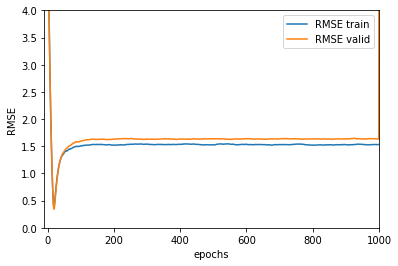

In [ ]:
plt.plot(rmse_train, label="RMSE train")
plt.plot(rmse_valid, label="RMSE valid")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.ylim([0, 4])
plt.xlim([-10, 1000])


plt.legend()
plt.show()


### 2

### 2.a

In [ ]:
rmse_2 = []
for alpha in [0.0001,0.001,0.01,0.1,0.5]:
    theta, b = SGD(train_x, train_y, 1000, alpha)
    rmse = RMSE(valid_x, valid_y, theta[-1], b[-1])
    rmse_2.append(rmse)
    

In [ ]:
final = np.array([["step size", "rmse"],[0.0001, rmse_2[0]], [0.001, rmse_2[1]], [0.01, rmse_2[2]], [0.1, rmse_2[3]], [0.5, rmse_2[4]]])
f = pd.DataFrame(final)
f
                

,0,1
0,step size,rmse
1,0.0001,1.63535537775918
2,0.001,1.62534367284661
3,0.01,1.685956558252589
4,0.1,1.7243225040018213
5,0.5,1.932250067612219


The best step size is 0.001

### 2.b

In [ ]:
alpha_test = 0.001
theta = np.zeros(1)
b = np.zeros(1)
theta, b= SGD(train_x, train_y, 1000, 0.001)
rmse_test = RMSE(test_x, test_y, theta[-1], b[-1])

rmse_test

1.6147289304723258

### 3

[355 984 939 900 152]
2.794079206210347
7.417099464382808
7.934548518036762
7.943282729765617
7.967270346953026


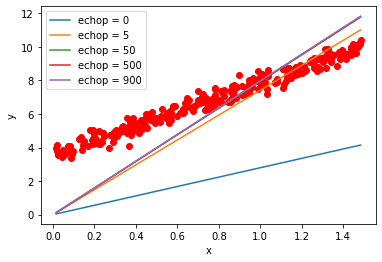

In [ ]:
rand = np.random.randint(0, high=1000, size=5)
print(rand)
new_x = []
new_y = []

rand = [0, 5, 50, 500, 900]
for i in rand:
    print(theta[i])
    new_x_, new_y_ = zip(*sorted(zip(train_x, np.dot(train_x, theta[i]))))
    new_x.append(new_x_)
    new_y.append(new_y_)

plt.plot(train_x, train_y, 'ro')
for i in range(5):
    plt.plot(new_x[i], new_y[i], label = f'echop = {rand[i]}')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



### 4 

In [ ]:
def RMSE(x, y, theta, b):
    x = x.reshape(len(x), 1)
    
    y_hat = np.dot(x, theta) + b
    rmse = np.sum((y - y_hat) ** 2) / int(len(y))
    return np.sqrt(rmse)
def LinearRegression(x, y, learning_rate, iteration):
    w_ = []
    b_ = []
    m = x.shape
    x= x.reshape((m[0],1))
    w = np.zeros(1)
    b = 0
    
    for i in range(iteration):
        y_hat = np.dot(x, w) + b
        gradient_w = 2 * np.dot(np.transpose(x), (y_hat - y)) / m
        gradient_b = 2 * np.sum((y_hat - y)) / m
        
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        w_.append(w)
        b_.append(b)
    
    return w_, b_

In [ ]:
w,b = LinearRegression(train_x, train_y, 0.001, 1000)

rmse_train_full = []
rmse_valid_full = []
for i in range(len(w)):
    rmse_train_full.append(RMSE(train_x, train_y, w[i], b[i]))
    rmse_valid_full.append(RMSE(valid_x, valid_y, w[i], b[i]))



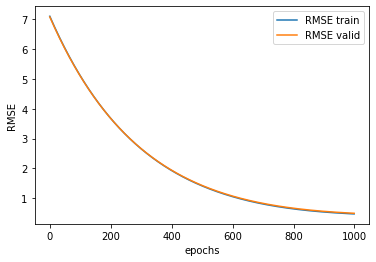

In [ ]:
plt.plot(rmse_train_full, label="RMSE train")
plt.plot(rmse_valid_full, label="RMSE valid")
plt.xlabel("epochs")
plt.ylabel("RMSE")
#plt.ylim([0, 4])
#plt.xlim([-10, 1000])


plt.legend()
plt.show()

### 5

1- on Full Gradient Descent we run the algorithm through all the data in your training set and do a single update for the parameters(w, b), on the other hand, in SGD we run the algorithm on just one sample or a subset of data in training data.

2- gradient descent ( with a large number of data) can be too slow to converge but SGD is more faster since we update the parameter based on small number of samples

3- The error function in SGD is not as minimum as GD

### 4 Real life dataset

### 1.a

In [80]:
import numpy as np
import pandas as pd

data = pd.read_csv("communities.data", header = None)

data_x = data.iloc[: , :-1]
data_y = data[:][127]


data_np = data.to_numpy()

In [81]:
# replace ? with NaN in the dataset

for i in range(len(data)):
    for j in range(128):
        if(data_np[i,j] =='?'):
            data_np[i,j] =np.NaN
            

data_np

array([[8, nan, nan, ..., 0.32, '0.14', 0.2],
       [53, nan, nan, ..., 0.0, nan, 0.67],
       [24, nan, nan, ..., 0.0, nan, 0.43],
       ...,
       [9, '9', '80070', ..., 0.91, '0.28', 0.23],
       [25, '17', '72600', ..., 0.22, '0.18', 0.19],
       [6, nan, nan, ..., 1.0, '0.13', 0.48]], dtype=object)

In [82]:
#compute mean for each column

data_np_mean = np.delete(data_np, obj = 3, axis =1)
data_np_mean = np.array(data_np_mean, dtype = 'float64')
mean = np.nanmean(data_np_mean, axis = 0)
mean_ = np.insert(mean, 3, 0)

In [83]:
#replace the NaN with the mean in each column
data_ = pd.DataFrame(data_np)
for i in range(1994):
    for j in range(128):
        if j != 3:
            if (pd.isna(data_.iloc[i,j])):
                data_.iloc[i,j] = int(mean_[j])
            

data_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,8,58,46188,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,0.2,1,0.37,0.72,0.34,0.6,0.29,0.15,0.43,0.39,0.4,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.1,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0,0.12,0.42,0.5,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14,0.2
1,53,58,46188,Tukwilacity,1,0,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.3,0.22,0.35,0.01,0.24,0.14,0.24,0.3,0.27,0.73,0.57,...,0.38,0.4,0.37,0.29,0.32,0.18,0,0,0.21,0.5,0.34,0.6,0.52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.12,0.45,0,0,0,0,0,0,0.67
2,24,58,46188,Aberdeentown,1,0,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0,0,0.3,0.58,0.19,0.39,0.38,0.4,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0,0,0.14,0.49,0.54,0.67,0.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.21,0.02,0,0,0,0,0,0,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1,0.08,0.12,0.1,0.51,0.5,0.34,0.21,0.06,1,0.58,0.89,0.21,0.43,0.36,0.2,0.82,0.51,0.36,0.4,0.39,0.16,0.25,0.36,0.44,0.01,0.1,0.09,0.25,0.31,0.33,0.71,0.36,...,0.7,0.77,0.89,0.63,0.51,0.47,0,0,0.19,0.3,0.73,0.64,0.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.39,0.28,0,0,0,0,0,0,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.5,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0,0.74,0.51,0.48,0,0.06,0.25,0.3,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0,0,0.11,0.72,0.64,0.61,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0.09,0.02,0,0,0,0,0,0,0.03


filling the missing data with the mean of each column maybe not be a good choice especially in skewed data and it can also reduce the variance of the data which it can produce bias in our model.

### 1.b

1- ignore the data that is missing which is not a good way since you might lose some valuable 
information(Dropping rows with null values, Dropping features with high nullity)

2-imputation using mean/median 

3- imputation using the most frequent item

4-imputation using zero or constant

5-imputing using k-nn algorithm

6- linear/stochastic regression imputation



### 1.c

in regression imputation, we fill the missing data by predicting it by using the regression model. we will predict the missing data with the information of other variables.

In the first step, we fill the missing data with some trivial method like filling with mean of each column, and then the regression model is estimated in the information of other data and using the regression weights to predict the missing data.

### 1.d

In [84]:
# drop the column= 3 since it's not numerical and also it does'nt have null value!
# this dataset is filled it's missing value with mean
data_missing = data_.drop(3, 1)
data_missing = pd.DataFrame(data_missing, dtype='float64')
data_missing_x = data_missing.iloc[:,0:126]
data_missing_y = data_missing.iloc[:,126]


In [85]:
def rmse(y, x, w, b):
    y_hat = x.dot(w) + b
    error = 0
    for i in range(len(y)):
        error = error + (y_hat[i] - y[i]) ** 2 / int(len(y))
    return np.sqrt(error)

def LinearRegression_(x, y, learning_rate, iteration):
    m, n = x.shape
    w = np.zeros(n)
    b = 0
    
    for i in range(iteration):
        y_hat = x.dot(w) + b
        gradient_w = 2 * x.T.dot(y_hat - y) / m
        gradient_b = 2 * np.sum(y_hat - y) / m
        
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
    
    return w, b

In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data_missing_x, data_missing_y)
print(reg.coef_, reg.intercept_)


[-5.81977810e-04 -1.54405177e-04 -1.79304298e-07 -1.53695737e-03
  2.94448220e-01 -1.19297032e-02  1.69653968e-01 -7.10430619e-02
 -2.99702134e-02  5.66919652e-02  1.32843690e-01 -2.47822371e-01
 -1.59427354e-01  2.57871586e-02 -3.66317624e-01  5.23098908e-02
 -1.98329937e-01 -1.91265748e-01  4.20903831e-02 -1.72333341e-01
  9.31914924e-02 -3.01743673e-03 -9.20090292e-02  3.01334928e-01
  1.43529236e-01 -3.89958880e-01 -3.58785844e-02 -3.20765021e-02
  1.94026257e-02  4.53519511e-02  3.33077478e-02  7.02750645e-02
 -1.80409134e-01 -7.85461693e-02  4.01752144e-02  4.15890018e-02
 -6.46675641e-03  2.53116570e-01 -6.18505867e-02 -1.14657419e-02
  7.09742450e-02  1.15030897e-01  4.56208926e-01  2.28338301e-01
  1.09652235e-01 -5.33832041e-01 -1.79604611e-01  1.36458465e-02
 -3.33735421e-01 -2.73818067e-02  1.62978006e-03  5.15593699e-02
 -1.84623491e-01 -1.42710303e-01  1.20733392e-01 -2.24767158e-01
  2.32318291e-02  1.89032948e-02 -7.34842093e-02  4.50460251e-02
 -3.98726710e-02 -1.79029

In [88]:
w, b = LinearRegression_(data_missing_x, data_missing_y, 0.01, 100)
rmse = rmse(data_missing_y, data_missing_x, w, b)

data_n = pd.DataFrame(data_np)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


In [89]:
data_n = data_n.drop(3,1)
pred = reg.predict(data_missing_x)
pred = pred.round(1)

for i in range(1994):
    for j in range(127):
        if j != 3:
            if (pd.isna(data_n.iloc[i,j])):
                data_n.iloc[i,j] =  (pred[i])
                
data_n.head()
#data_n is the entire data base which is filled it's missing data with regression imputation
#I used scikit learn to just get the w and b because my laptop and google colab could not handle this matrix     

,0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,8,0.2,0.2,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,0.2,1,0.37,0.72,0.34,0.6,0.29,0.15,0.43,0.39,0.4,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.1,0.18,0.48,0.27,0.68,0.23,0.41,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0,0.12,0.42,0.5,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14,0.2
1,53,0.3,0.3,1,0,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.3,0.22,0.35,0.01,0.24,0.14,0.24,0.3,0.27,0.73,0.57,0.15,...,0.38,0.4,0.37,0.29,0.32,0.18,0,0,0.21,0.5,0.34,0.6,0.52,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.02,0.12,0.45,0.3,0.3,0.3,0.3,0,0.3,0.67
2,24,0.4,0.4,1,0,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0,0,0.3,0.58,0.19,0.39,0.38,0.4,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,...,0.29,0.27,0.31,0.48,0.39,0.28,0,0,0.14,0.49,0.54,0.67,0.56,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.01,0.21,0.02,0.4,0.4,0.4,0.4,0,0.4,0.43
3,34,5,81440,1,0.04,0.77,1,0.08,0.12,0.1,0.51,0.5,0.34,0.21,0.06,1,0.58,0.89,0.21,0.43,0.36,0.2,0.82,0.51,0.36,0.4,0.39,0.16,0.25,0.36,0.44,0.01,0.1,0.09,0.25,0.31,0.33,0.71,0.36,0.45,...,0.7,0.77,0.89,0.63,0.51,0.47,0,0,0.19,0.3,0.73,0.64,0.65,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.02,0.39,0.28,0.3,0.3,0.3,0.3,0,0.3,0.12
4,42,95,6096,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.5,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0,0.74,0.51,0.48,0,0.06,0.25,0.3,0.33,0.12,0.65,0.67,0.38,...,0.36,0.38,0.38,0.22,0.51,0.21,0,0,0.11,0.72,0.64,0.61,0.53,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,0.04,0.09,0.02,-0,-0,-0,-0,0,-0,0.03


### 2

In [90]:
#data_ = data_.drop(3,1)
test_size = int(data.shape[0] * 0.2)
test_data = data_n.iloc[:test_size, : ]
test_data_x = test_data.iloc[:,0:126]
test_data_y = test_data.iloc[:, 126]


test_data.shape

(398, 127)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [91]:
remaining = data.shape[0] - test_size
train_size = int(remaining * 0.8)
data_n = pd.DataFrame(data_n, dtype='float64')
train_data = data_n.iloc[test_size : test_size + train_size, :]
train_data.shape
train_data_x = train_data.iloc[:,0:126]
train_data_y = train_data.iloc[:, 126]

train_data.head()



,0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
398,51.0,630.0,29744.0,2.0,0.01,0.39,0.42,0.64,0.06,0.04,0.72,0.81,0.76,0.43,0.03,1.0,0.25,0.56,0.16,0.41,0.51,0.26,0.44,0.29,0.30,0.34,0.24,0.17,0.16,0.22,0.35,0.02,0.32,0.39,0.45,0.42,0.16,0.49,0.13,0.50,...,0.41,0.42,0.42,0.54,0.41,0.32,0.01,0.14,0.08,0.58,0.36,0.17,0.50,0.40,0.40,0.40,0.40,0.40,0.4,0.4,0.40,0.40,0.40,0.4,0.40,0.4,0.40,0.40,0.40,0.40,0.03,0.15,0.12,0.40,0.40,0.40,0.4,0.00,0.40,0.18
399,12.0,0.7,0.7,2.0,0.03,0.00,0.28,0.76,0.03,0.16,0.04,0.09,0.05,1.00,0.05,1.0,0.15,0.00,0.12,0.58,1.00,0.20,0.47,0.19,0.40,0.45,0.17,0.42,0.48,0.27,0.41,0.04,0.42,0.38,0.56,0.21,0.47,0.00,0.17,0.25,...,0.38,0.47,0.40,0.99,0.69,0.40,0.00,0.00,0.74,0.06,0.62,0.58,0.51,0.70,0.70,0.70,0.70,0.70,0.7,0.7,0.70,0.70,0.70,0.7,0.70,0.7,0.70,0.70,0.70,0.70,0.01,0.62,0.21,0.70,0.70,0.70,0.7,0.00,0.70,0.80
400,39.0,139.0,47138.0,3.0,0.07,0.36,0.35,0.71,0.04,0.02,0.40,0.50,0.34,0.49,0.08,1.0,0.18,0.41,0.10,0.40,0.54,0.56,0.57,0.22,0.23,0.24,0.20,0.16,0.88,0.09,0.21,0.08,0.47,0.38,0.53,0.19,0.58,0.28,0.67,0.35,...,0.17,0.16,0.18,0.43,0.18,0.39,0.02,0.00,0.08,0.78,0.55,0.76,0.84,0.30,0.30,0.30,0.30,0.30,0.3,0.3,0.30,0.30,0.30,0.3,0.30,0.3,0.30,0.30,0.30,0.30,0.08,0.15,0.07,0.30,0.30,0.30,0.3,0.00,0.30,1.00
401,55.0,79.0,53000.0,3.0,0.99,0.42,0.59,0.44,0.11,0.11,0.44,0.56,0.37,0.39,0.99,1.0,0.20,0.45,0.11,0.44,0.48,0.75,0.47,0.21,0.20,0.28,0.18,0.13,0.15,0.18,0.22,1.00,0.59,0.33,0.49,0.22,0.59,0.42,0.51,0.45,...,0.27,0.30,0.28,0.59,0.41,0.57,0.30,0.12,0.14,0.71,0.52,0.79,0.75,0.41,0.29,0.63,0.32,0.16,0.1,0.1,0.29,0.56,0.72,0.3,0.12,0.0,0.28,0.16,0.79,0.57,0.28,0.55,0.62,0.37,0.38,0.57,0.5,0.24,0.25,0.40
402,22.0,0.3,0.3,3.0,0.00,0.45,0.41,0.65,0.09,0.02,0.56,0.60,0.46,0.45,0.02,1.0,0.14,0.48,0.16,0.35,0.49,0.42,0.56,0.16,0.16,0.20,0.15,0.19,0.04,0.36,0.17,0.02,0.55,0.43,0.48,0.30,0.51,0.34,0.15,0.79,...,0.15,0.14,0.17,0.34,0.20,0.60,0.00,0.00,0.06,0.78,0.50,0.66,0.80,0.30,0.30,0.30,0.30,0.30,0.3,0.3,0.30,0.30,0.30,0.3,0.30,0.3,0.30,0.30,0.30,0.30,0.02,0.15,0.06,0.30,0.30,0.30,0.3,0.00,0.30,0.05


In [92]:
remaining_valid = data.shape[0] - test_size - train_size
valid_data = data_n.iloc[test_size+ train_size  :, :]
valid_data.shape

(320, 127)

### 2.a

In [93]:
w, b = LinearRegression_(train_data_x, train_data_y, 0.01, 2)
print(w, b)

0     -7.460795e+05
1     -1.232640e+06
2     -1.310525e+09
4     -1.231994e+05
5     -1.058334e+03
           ...     
122   -2.288254e+03
123   -4.295925e+03
124   -2.941331e+03
125   -1.686733e+03
126   -2.662016e+03
Length: 126, dtype: float64 -21638.017965280207


In [94]:
# here I ran regression with sklearn since my laptop is not strong enough to run my regression on it but I implement it as well
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_data_x, train_data_y)
print(reg.coef_, reg.intercept_)



[-4.88459384e-04 -1.01316758e-04 -3.95169334e-07 -1.70598373e-03
  6.42890822e-02 -5.94103134e-03  2.65511413e-01 -6.84958353e-03
 -5.33527327e-02  2.66285906e-02  1.74222422e-01 -3.02003879e-01
 -2.16012727e-01 -5.22323133e-02 -4.62932289e-01  6.48483983e-02
 -2.89986828e-01 -1.80919125e-01  1.34050797e-02 -1.74549218e-01
  2.15087021e-01  6.44209402e-02 -1.16368403e-01  3.11404951e-01
 -2.18784129e-03 -3.03580698e-01 -2.91557936e-02 -4.62209880e-02
  3.89972078e-02  3.99431714e-02  2.72645496e-02  2.89080712e-01
 -2.62850572e-01 -6.53259402e-02  3.66004975e-02  1.85071886e-01
  5.57641041e-02  3.41594743e-01 -8.36664117e-02 -5.40558523e-02
  1.15391211e-01  9.56910642e-02  4.81549731e-01  2.60415851e-01
 -4.51782579e-02 -4.59523052e-01 -4.11631538e-01 -5.20290525e-02
 -2.85458797e-01  2.73102787e-02  1.57932849e-02  4.51551548e-02
 -1.91378981e-01 -2.06380679e-01  1.49248114e-01 -7.90682889e-02
  5.59584142e-02 -2.23227449e-02  6.40755601e-02 -8.53342135e-02
 -1.62733717e-02 -6.67689

In [95]:
from random import randrange

def cross_validation(x, n):
    k_fold = []
    fold_size = int(x.shape[0] / n)
    for i in range(n):
        fold = []
        while len(fold) < fold_size:
            index = randrange(x.shape[0])
            fold.append(x.iloc[index,:])
        k_fold.append(fold)
    return k_fold


In [96]:
def rmse(y, x, w, b):
    #w = w.values.reshape((126,1))
    y_hat = x.dot(w) + b
    error = 0
    for i in range(len(y)):
        error = error + (y_hat[i] - y[i]) ** 2 / int(len(y))
    return np.sqrt(error)


k_fold = cross_validation(valid_data, 5)
fold_rmse= []
for d in (k_fold):
    d = pd.DataFrame(d)
    data_x = d.iloc[:,:126]
    data_y = d.iloc[:,-1]
    y_hat = data_x.dot(reg.coef_) + reg.intercept_
    error_rmse = np.sum((y_hat - data_y)**2) / 1994
    fold_rmse.append(error_rmse)
    
print(f"5-fold cross-validation average RMSE is :{np.average(fold_rmse)} ")

5-fold cross-validation average RMSE is :0.0005378357434981447 


### 2.b

In [97]:
#print(test_data_x.head())
test_x =test_data_x.to_numpy(dtype = 'float64')
y_hat = np.dot(test_x, reg.coef_) + reg.intercept_
#y_hat = test_x.dot(reg.coef_) + reg.intercept_
error_rmse = np.sum((y_hat - test_data_y)**2) / 1994
print(f"test RMSE is :{error_rmse} ")

test RMSE is :0.003976107921357373 


### 3

In [98]:
def rigid(x, y, learning_rate, landa, iteration):
    w_ = []
    b_ = []
    m, n = x.shape
    w = np.zeros(n)
    b = 0
    
    for i in range(iteration):
        y_hat = np.dot(x, w) + b
        gradient_w = 2 *( np.dot(np.transpose(x), (y_hat - y))) + ( 2 * landa * w )   / m
        gradient_b = 2 * np.sum((y_hat - y)) / m
        
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        w_.append(w)
        b_.append(b)
    
    return w, b

### 3.a

In [110]:
from sklearn import linear_model

landa = [ 0,0.1, 0.01, 0.001, 0.0001]
ave = []
for l in landa:
    
    kfold = cross_validation(valid_data, 5)
    fold_rmse= []
    for d in (k_fold):
        d = pd.DataFrame(d)
        data_x = d.iloc[:,:126]
        data_y = d.iloc[:,-1]
        reg = linear_model.Ridge(alpha=l)
        reg.fit(data_x, data_y)
        #w, b =rigid(data_x, data_y, 0.5, l, 10)
        y_hat = data_x.dot(reg.coef_) + reg.intercept_
        error_rmse = np.sum((y_hat - data_y)**2) / 1994
        fold_rmse.append(error_rmse)
    ave.append(np.average(fold_rmse))
    
    
#print(f"5-fold cross-validation average RMSE is :{np.average(fold_rmse)} ")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.p

[1.5139859888902382e-12, 3.640739382861271e-05, 2.591611817328552e-06, 4.413862662326075e-08, 4.766207503574767e-10]


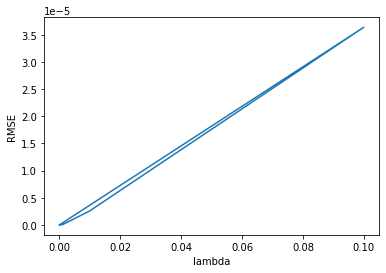

In [111]:
import matplotlib.pyplot as plt

print(ave)
plt.plot(landa, ave)
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.show()

3.b


lambda = 0.1 is the best fit

3.c

In [115]:
test_data_x = test_data_x.to_numpy(dtype = 'float64')

y_hat = test_data_x.dot(reg.coef_) + reg.intercept_
error_rmse = np.sum((y_hat - test_data_y)**2) / 1994
print(f"test RMSE is :{error_rmse} ")

test RMSE is :0.022755918237488515 


3.d


yes we can use the information for feature selecting. we can omit(delete) the features where w=0.






3.e

In [116]:
print(reg.coef_)

[ 5.65865967e-04 -2.82236753e-04 -6.98564691e-07  2.61420397e-02
  7.05586721e-02  1.03353318e-02  3.41345646e-01 -2.53442805e-01
  6.29959156e-02  1.25647709e-01  2.54962851e-01  1.80872925e-01
  7.50500570e-02 -1.85418966e-01  3.38351145e-02  3.63273049e-02
  4.21032481e-02  6.90213501e-03  9.16223299e-02 -3.99559656e-02
  4.02172356e-01 -1.16249431e-01 -2.06618629e-01  2.50030026e-02
  2.33358211e-02  7.72969120e-02 -1.26431757e-01  5.56742378e-02
  1.33892714e-02  4.50354255e-02  9.08033054e-02  1.16338869e-01
 -3.45404684e-02 -6.43565860e-03  3.87357918e-02 -6.93751850e-02
  6.11844671e-02 -2.78609007e-01  2.18493896e-02  2.32389364e-01
  1.12448219e-01  5.84045004e-01  9.55573575e-02 -4.88761618e-01
 -3.14016175e-02  2.57903056e-02  9.35259096e-02 -2.18632663e-01
 -1.60892065e-01 -3.23276434e-02  2.82965648e-01  1.74794321e-01
 -1.32623889e-01  1.11693320e-01  4.18695050e-01  1.05047910e-02
  1.44188769e-02  5.61661133e-02 -2.23463469e-01 -2.06509971e-01
 -9.89959325e-03  2.62407

3.f

by reducing the feature we will reduce the computational complexity of the model and just consider the feature that is most important for our prediction. so it will decrease the RMSE error as well.